In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Mall_Customers.csv', sep=',')

In [3]:
len(data.columns)

5

In [4]:
lista = list(data)

In [5]:
lista

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
data['Age'].isnull().sum()

0

In [19]:
def age_ranges(age):
    if 0 <= age < 20:
        return '< 20'
    if 20 <= age < 40:
        return 'Entre 20 e 40'
    if 40 <= age < 60:
        return 'Entre 40 e 60'
    if age > 60:
        return 'Acima de 60'

In [20]:
data['Age Ranges'] = data['Age'].agg(age_ranges)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Ranges
0,1,Male,19,15,39,< 20
1,2,Male,21,15,81,Entre 20 e 40
2,3,Female,20,16,6,Entre 20 e 40
3,4,Female,23,16,77,Entre 20 e 40
4,5,Female,31,17,40,Entre 20 e 40


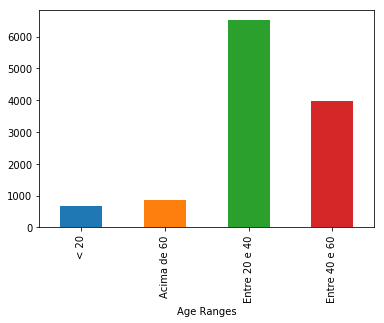

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show(data.groupby('Age Ranges')['Annual Income (k$)'].sum().plot.bar())

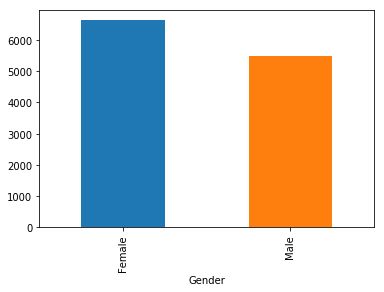

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show(data.groupby('Gender')['Annual Income (k$)'].sum().plot.bar())

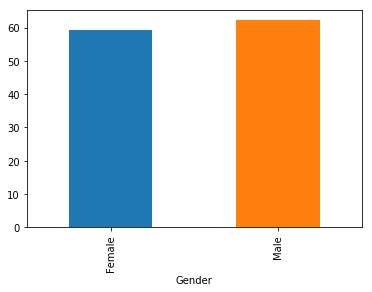

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show(data.groupby('Gender')['Annual Income (k$)'].mean().plot.bar())

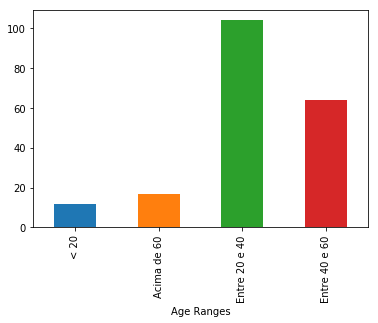

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show(data.groupby('Age Ranges')['Gender'].count().plot.bar())

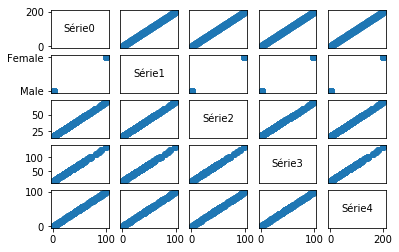

In [9]:
import matplotlib.pyplot as plt

num_columns = len(data.columns)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range (num_columns):
    for j in range (num_columns):
        
        if i != j: ax[i][j].scatter(data[lista[i]], data[lista[i]])
            
        else: ax[i][j].annotate("Série" + str(i), (0.5, 0.5),
                               xycoords='axes fraction',
                               ha="center", va="center")
        
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()


In [5]:
def score_ranges(score):
    if 0 <= score < 20:
        return 1
    if 20 <= score < 40:
        return 2
    if 40 <= score < 60:
        return 3
    if 60 <= score < 80:
        return 4
    if score > 80:
        return 5

In [6]:
data['Spending Score Ranges'] = data['Spending Score (1-100)'].agg(score_ranges)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score Ranges
0,1,Male,19,15,39,2
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [7]:
#Transformando uma variável categórica em variável numérica
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Score Ranges
0,1,1,19,15,39,2
1,2,1,21,15,81,5
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [10]:
data = data.drop(columns="Spending Score (1-100)")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score Ranges
0,1,1,19,15,2
1,2,1,21,15,5
2,3,0,20,16,1
3,4,0,23,16,4
4,5,0,31,17,3


In [11]:
data = data.drop(columns="CustomerID")
data.head()

,Gender,Age,Annual Income (k$),Spending Score Ranges
0,1,19,15,2
1,1,21,15,5
2,0,20,16,1
3,0,23,16,4
4,0,31,17,3


## Preparação dos dados para aplicação do modelo

In [12]:
import os
exec(open(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.1 (default, Dec 10 2018 22:54:23)
SparkSession available as 'spark'.


In [15]:
df = spark.createDataFrame(data)

In [16]:
df.show()

+------+---+------------------+---------------------+
|Gender|Age|Annual Income (k$)|Spending Score Ranges|
+------+---+------------------+---------------------+
|     1| 19|                15|                    2|
|     1| 21|                15|                    5|
|     0| 20|                16|                    1|
|     0| 23|                16|                    4|
|     0| 31|                17|                    3|
|     0| 22|                17|                    4|
|     0| 35|                18|                    1|
|     0| 23|                18|                    5|
|     1| 64|                19|                    1|
|     0| 30|                19|                    4|
|     1| 67|                19|                    1|
|     0| 35|                19|                    5|
|     0| 58|                20|                    1|
|     0| 24|                20|                    4|
|     1| 37|                20|                    1|
|     1| 22|                

In [17]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['Gender',
                                               "Age", 
                                               "Annual Income (k$)"], outputCol = 'features')
dfi = vectorAssembler.transform(df)
dfi.show(3)

+------+---+------------------+---------------------+---------------+
|Gender|Age|Annual Income (k$)|Spending Score Ranges|       features|
+------+---+------------------+---------------------+---------------+
|     1| 19|                15|                    2|[1.0,19.0,15.0]|
|     1| 21|                15|                    5|[1.0,21.0,15.0]|
|     0| 20|                16|                    1|[0.0,20.0,16.0]|
+------+---+------------------+---------------------+---------------+
only showing top 3 rows



In [18]:
dfi = dfi.withColumnRenamed("Spending Score Ranges","label")
dfi.show(1)

+------+---+------------------+-----+---------------+
|Gender|Age|Annual Income (k$)|label|       features|
+------+---+------------------+-----+---------------+
|     1| 19|                15|    2|[1.0,19.0,15.0]|
+------+---+------------------+-----+---------------+
only showing top 1 row



Text(0.5, 1.0, 'Real data')

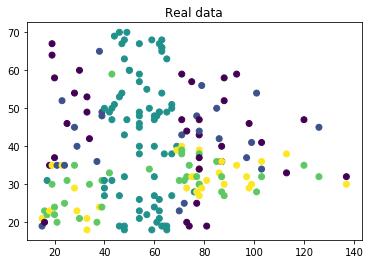

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

df_graph = dfi.collect()
pL = [float(row['Annual Income (k$)']) for row in df_graph]
pW = [float(row['Age']) for row in df_graph]
labels = [float(row['label']) for row in df_graph]


plt.scatter(pL, pW, c=labels)
plt.title("Real data")

In [19]:
def clusterize(df_features, clusters):
    k_means = KMeans(featuresCol='features', k=clusters, seed=1)
    model = k_means.fit(df_features)
    return model

In [21]:
features = dfi.select('features')

In [22]:
from pyspark.ml.clustering import KMeans

model_k5 = clusterize(features, 5)

In [23]:
model_k5.clusterCenters()

[array([ 0.40625, 55.6875 , 38.59375]),
 array([ 0.44067797, 29.22033898, 71.52542373]),
 array([ 0.38095238, 27.16666667, 29.5952381 ]),
 array([  0.46428571,  38.14285714, 103.64285714]),
 array([ 0.51282051, 52.69230769, 64.41025641])]

In [24]:
k5_data = model_k5.transform(dfi)

In [27]:
k5_data.select(['label', 'prediction']).sample(False, 0.1).show(20)

+-----+----------+
|label|prediction|
+-----+----------+
|    4|         2|
|    1|         0|
|    2|         2|
|    4|         2|
|    1|         0|
|    1|         0|
|    4|         2|
|    3|         2|
|    3|         0|
|    4|         0|
|    3|         0|
|    3|         1|
|    3|         1|
|    3|         4|
|    3|         1|
|    3|         4|
|    3|         1|
|    2|         4|
|    1|         1|
|    3|         1|
+-----+----------+
only showing top 20 rows



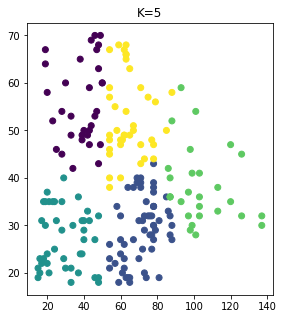

In [34]:
labels5 = [float(row['prediction']) for row in k5_data.collect()]

def plot_cluster(x, y, colors, title, subplot):
    plt.subplot(subplot)
    plt.scatter(x, y, c=colors)
    plt.title(title)

plt.figure(figsize=(15, 5))

plot_cluster(pL, pW, labels5, "K=5", 132)